In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


In [2]:
df=pd.read_csv("Expanded_Dataset.csv")
df.head()

,Year,Quarter,Product Model,5G Capability,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
0,2019,Q1,Galaxy S10,No,26396,4.212951e+06,1.04,57.36,39.55,293.10,55.87,Asia-Pacific
1,2019,Q1,Galaxy Note10,No,25671,7.240266e+06,2.82,85.80,42.58,67.46,37.26,Latin America
2,2019,Q1,Galaxy S20,No,16573,2.560833e+07,-0.03,47.02,3.78,77.25,84.66,Middle East & Africa
3,2019,Q1,Galaxy Note20,No,7177,2.198442e+07,0.84,25.70,23.41,105.27,40.03,North America
4,2019,Q1,Galaxy S21,No,45633,1.634244e+07,2.36,89.13,44.43,206.17,76.88,Latin America


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1000 non-null   int64  
 1   Quarter                    1000 non-null   object 
 2   Product Model              1000 non-null   object 
 3   5G Capability              1000 non-null   object 
 4   Units Sold                 1000 non-null   int64  
 5   Revenue ($)                1000 non-null   float64
 6   Market Share (%)           1000 non-null   float64
 7   Regional 5G Coverage (%)   1000 non-null   float64
 8   5G Subscribers (millions)  1000 non-null   float64
 9   Avg 5G Speed (Mbps)        1000 non-null   float64
 10  Preference for 5G (%)      1000 non-null   float64
 11  Region                     1000 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 93.9+ KB


In [4]:
# Kolon isimlerini Türkçeleştirme
yeni_kolonlar = {
    'Year': 'Yıl',
    'Quarter': 'Çeyrek',
    'Product Model': 'Ürün Modeli',
    '5G Capability': '5G Özelliği',
    'Units Sold': 'Satılan Birim',
    'Revenue ($)': 'Gelir ($)',
    'Market Share (%)': 'Pazar Payı (%)',
    'Regional 5G Coverage (%)': 'Bölgesel 5G Kapsama (%)',
    '5G Subscribers (millions)': '5G Abone Sayısı (milyon)',
    'Avg 5G Speed (Mbps)': 'Ortalama 5G Hızı (Mbps)',
    'Preference for 5G (%)': '5G Tercih Oranı (%)',
    'Region': 'Bölge'
}

df = df.rename(columns=yeni_kolonlar)


df.head()

,Yıl,Çeyrek,Ürün Modeli,5G Özelliği,Satılan Birim,Gelir ($),Pazar Payı (%),Bölgesel 5G Kapsama (%),5G Abone Sayısı (milyon),Ortalama 5G Hızı (Mbps),5G Tercih Oranı (%),Bölge
0,2019,Q1,Galaxy S10,No,26396,4.212951e+06,1.04,57.36,39.55,293.10,55.87,Asia-Pacific
1,2019,Q1,Galaxy Note10,No,25671,7.240266e+06,2.82,85.80,42.58,67.46,37.26,Latin America
2,2019,Q1,Galaxy S20,No,16573,2.560833e+07,-0.03,47.02,3.78,77.25,84.66,Middle East & Africa
3,2019,Q1,Galaxy Note20,No,7177,2.198442e+07,0.84,25.70,23.41,105.27,40.03,North America
4,2019,Q1,Galaxy S21,No,45633,1.634244e+07,2.36,89.13,44.43,206.17,76.88,Latin America


In [5]:
df.describe()

,Yıl,Satılan Birim,Gelir ($),Pazar Payı (%),Bölgesel 5G Kapsama (%),5G Abone Sayısı (milyon),Ortalama 5G Hızı (Mbps),5G Tercih Oranı (%)
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2021.456000,32842.990000,3.019733e+07,3.723570,66.889720,30.152080,179.225560,67.14291
std,1.700281,16039.770572,1.837941e+07,1.991108,19.254095,14.537781,70.470934,15.75925
min,2019.000000,5309.000000,2.987436e+06,-0.490000,25.340000,-0.890000,50.370000,37.14000
25%,2020.000000,19327.250000,1.460749e+07,2.635000,50.400000,18.412500,120.410000,53.26750
50%,2021.000000,33689.000000,2.801200e+07,3.760000,67.050000,29.915000,177.390000,66.96000
75%,2023.000000,43911.000000,4.180391e+07,5.282500,83.210000,44.360000,238.860000,80.99000
max,2024.000000,64883.000000,8.426494e+07,6.950000,103.920000,54.940000,298.700000,94.84000


Bölgelere Göre Toplam Satış:
               Bölge  Satılan Birim
        Asia-Pacific        5548395
              Europe        6214226
       Latin America        6995406
Middle East & Africa        6711340
       North America        7373623

Bölgelere Göre Toplam Gelir:
               Bölge     Gelir ($)
        Asia-Pacific 5,685,065,893
              Europe 5,578,138,784
       Latin America 6,892,401,889
Middle East & Africa 5,444,651,596
       North America 6,597,073,736

Çeyrek Bazında Bölgesel Satış Analizi:
Çeyrek                     Q1       Q2       Q3       Q4
Bölge                                                   
Asia-Pacific          1432407   885435  1724091  1506462
Europe                1855894  1218107  1873190  1267035
Latin America         2025152  2100073  1359453  1510728
Middle East & Africa  1597398  1789128  2076777  1248037
North America         1624961  1864206  1823433  2061023


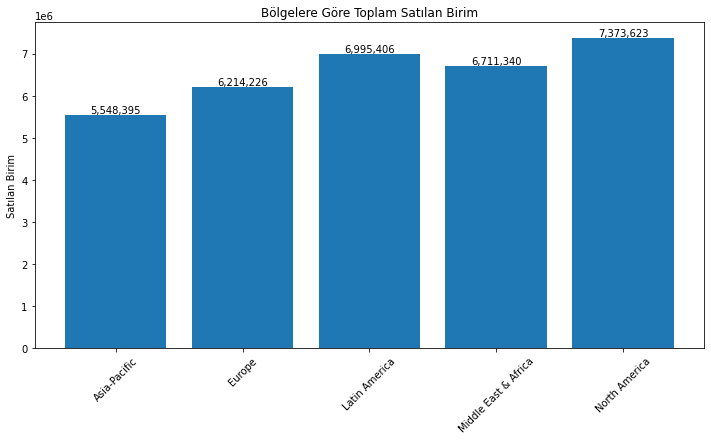

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Bölgelere göre toplam satış 
bolge_satis = df.groupby('Bölge')['Satılan Birim'].sum().reset_index()
bolge_gelir = df.groupby('Bölge')['Gelir ($)'].agg(lambda x: sum(float(str(i).replace(',', '')) for i in x)).reset_index()
bolge_gelir['Gelir ($)'] = bolge_gelir['Gelir ($)'].apply(lambda x: '{:,.0f}'.format(x))

# Sonuçları gösterme
print("Bölgelere Göre Toplam Satış:")
print(bolge_satis.to_string(index=False))
print("\nBölgelere Göre Toplam Gelir:")
print(bolge_gelir.to_string(index=False))
plt.figure(figsize=(12, 6))
bars = plt.bar(bolge_satis['Bölge'], bolge_satis['Satılan Birim'])
plt.title('Bölgelere Göre Toplam Satılan Birim')
plt.xticks(rotation=45)
plt.ylabel('Satılan Birim')

#grafikte değer gösterme 
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom')

ceyrek_analizi = df.pivot_table(
    values='Satılan Birim',
    index=['Bölge'],
    columns=['Çeyrek'],
    aggfunc='sum'
).round(0)
print("\nÇeyrek Bazında Bölgesel Satış Analizi:")
print(ceyrek_analizi)

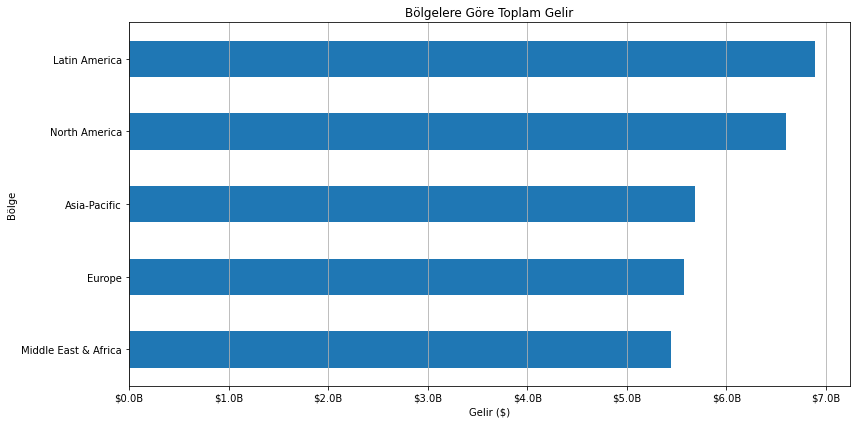


Bölgelere Göre Toplam Gelir:
Middle East & Africa: $5,444,651,596
Europe: $5,578,138,784
Asia-Pacific: $5,685,065,893
North America: $6,597,073,736
Latin America: $6,892,401,889

Bölgesel Gelir Dağılımı (%):
Middle East & Africa: %18.0
Europe: %18.5
Asia-Pacific: %18.8
North America: %21.8
Latin America: %22.8


In [8]:
# Bölgelere göre toplam gelir a
bolge_gelir = df.groupby('Bölge')['Gelir ($)'].sum().sort_values(ascending=True)


plt.figure(figsize=(12, 6))
bolge_gelir.plot(kind='barh')
plt.title('Bölgelere Göre Toplam Gelir')
plt.xlabel('Gelir ($)')
plt.ylabel('Bölge')

# Gelir değerlerini milyar  formatında gösterme
def milyar_format(x, pos):
    return f'${x/1e9:.1f}B'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(milyar_format))
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


print("\nBölgelere Göre Toplam Gelir:")
for bolge, gelir in bolge_gelir.items():
    print(f"{bolge}: ${gelir:,.0f}")


toplam_gelir = bolge_gelir.sum()
print("\nBölgesel Gelir Dağılımı (%):")
for bolge, gelir in bolge_gelir.items():
    yuzde = (gelir / toplam_gelir) * 100
    print(f"{bolge}: %{yuzde:.1f}")

<Figure size 1080x576 with 0 Axes>

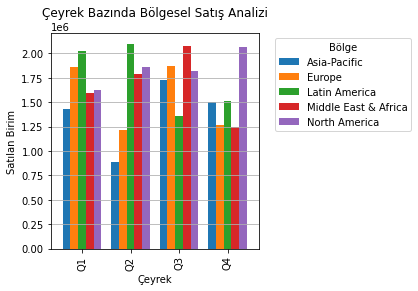


Çeyrek Bazında Bölgesel Satış Miktarları:
Bölge   Asia-Pacific   Europe  Latin America  Middle East & Africa  North America
Çeyrek                                                                           
Q1           1432407  1855894        2025152               1597398        1624961
Q2            885435  1218107        2100073               1789128        1864206
Q3           1724091  1873190        1359453               2076777        1823433
Q4           1506462  1267035        1510728               1248037        2061023


In [9]:
# Çeyrek bazında bölgesel satış analizi 
plt.figure(figsize=(15, 8))


ceyrek_bolge = df.pivot_table(
    values='Satılan Birim',
    index='Çeyrek',
    columns='Bölge',
    aggfunc='sum'
)


ceyrek_bolge.plot(kind='bar', width=0.8)
plt.title('Çeyrek Bazında Bölgesel Satış Analizi')
plt.xlabel('Çeyrek')
plt.ylabel('Satılan Birim')
plt.legend(title='Bölge', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


print("\nÇeyrek Bazında Bölgesel Satış Miktarları:")
print(ceyrek_bolge.round(0).to_string())

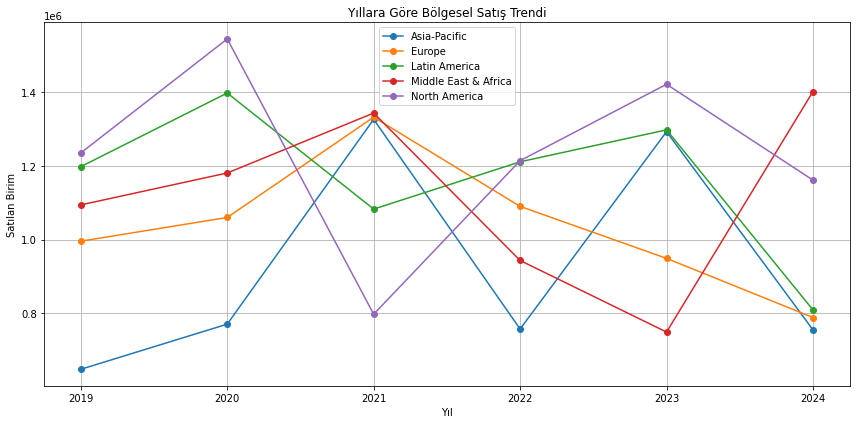


Bölgelere Göre Ortalama Pazar Payı (%):
Bölge
Asia-Pacific            3.68
Europe                  3.68
Latin America           4.11
Middle East & Africa    3.44
North America           3.69


In [10]:
# Yıllara ve bölgelere göre satış trendi
yil_bolge = df.groupby(['Yıl', 'Bölge'])['Satılan Birim'].sum().reset_index()

plt.figure(figsize=(12, 6))
for bolge in yil_bolge['Bölge'].unique():
    bolge_data = yil_bolge[yil_bolge['Bölge'] == bolge]
    plt.plot(bolge_data['Yıl'], bolge_data['Satılan Birim'], marker='o', label=bolge)

plt.title('Yıllara Göre Bölgesel Satış Trendi')
plt.xlabel('Yıl')
plt.ylabel('Satılan Birim')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


pazar_payi = df.groupby('Bölge')['Pazar Payı (%)'].mean().round(2)
print("\nBölgelere Göre Ortalama Pazar Payı (%):")
print(pazar_payi.to_string())

In [11]:

# En çok satan modeller
model_satis = df.groupby('Ürün Modeli').agg({
    'Satılan Birim': 'sum',
    'Gelir ($)': lambda x: sum(float(str(i).replace(',', '')) for i in x)
}).sort_values('Satılan Birim', ascending=False)





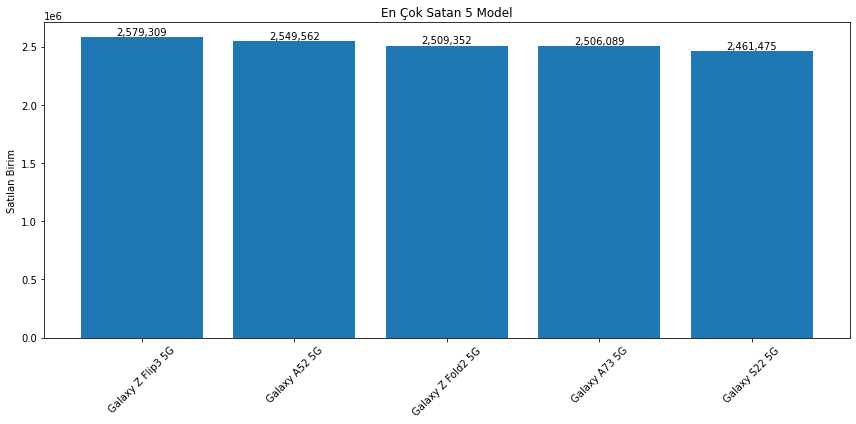

In [12]:
#en çok satan 5 model
plt.figure(figsize=(12, 6))
top_5_models = model_satis.head()
bars = plt.bar(range(len(top_5_models)), top_5_models['Satılan Birim'])
plt.xticks(range(len(top_5_models)), top_5_models.index, rotation=45)
plt.title('En Çok Satan 5 Model')
plt.ylabel('Satılan Birim')

# Her çubuğun üzerine değeri ekleme
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

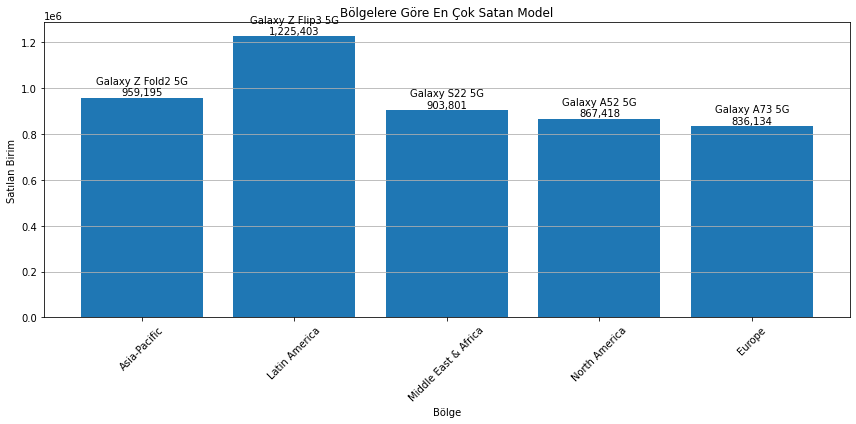

In [13]:
# Bölgelere göre en çok satan modelleri bulalım
bolge_model_satis = df.groupby(['Bölge', 'Ürün Modeli'])['Satılan Birim'].sum().reset_index()
en_cok_satan_modeller = {}

for bolge in df['Bölge'].unique():
    bolge_data = bolge_model_satis[bolge_model_satis['Bölge'] == bolge]
    en_cok_satan = bolge_data.nlargest(1, 'Satılan Birim')
    en_cok_satan_modeller[bolge] = {
        'Model': en_cok_satan['Ürün Modeli'].iloc[0],
        'Satış': en_cok_satan['Satılan Birim'].iloc[0]
    }


plt.figure(figsize=(12, 6))
bolgeler = list(en_cok_satan_modeller.keys())
satislar = [data['Satış'] for data in en_cok_satan_modeller.values()]
bars = plt.bar(bolgeler, satislar)

# Başlık ve etiketler
plt.title('Bölgelere Göre En Çok Satan Model')
plt.xlabel('Bölge')
plt.ylabel('Satılan Birim')
plt.xticks(rotation=45)

# Her çubuğun üzerine model adı ve satış miktarını ekleme
for bar, bolge in zip(bars, bolgeler):
    height = bar.get_height()
    model = en_cok_satan_modeller[bolge]['Model']
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{model}\n{int(height):,}',
             ha='center', va='bottom')

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Yıllık Toplam Satış ve Gelir:
      Satılan Birim      Gelir ($)
Yıl                               
2019        5169832  5,607,306,562
2020        5952857  5,426,482,415
2021        5881490  5,127,701,556
2022        5214853  4,803,942,913
2023        5709287  4,172,478,016
2024        4914671  5,059,420,435

Yıllık Büyüme Oranı (%):
Yıl
2019      NaN
2020    15.15
2021    -1.20
2022   -11.33
2023     9.48
2024   -13.92


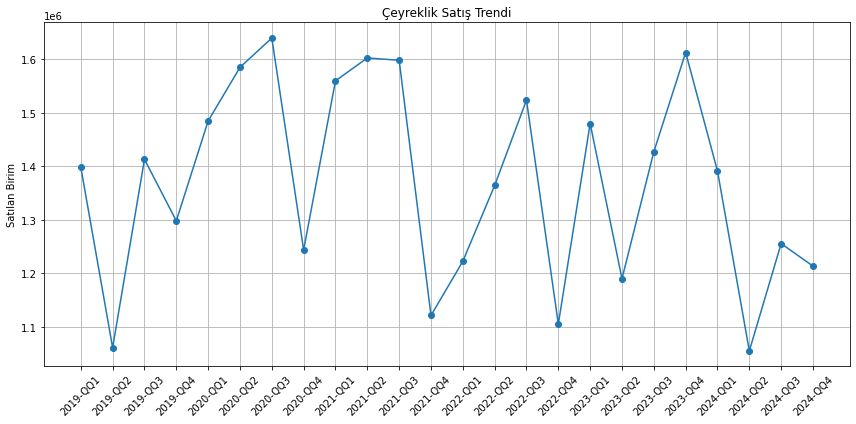

In [15]:


# Yıllık toplam satış ve gelir
yillik_analiz = df.groupby('Yıl').agg({
    'Satılan Birim': 'sum',
    'Gelir ($)': 'sum'
}).round(0)
yillik_analiz['Gelir ($)'] = yillik_analiz['Gelir ($)'].apply(lambda x: '{:,.0f}'.format(x))

print("Yıllık Toplam Satış ve Gelir:")
print(yillik_analiz[['Satılan Birim', 'Gelir ($)']].to_string())

# Yıllık büyüme oranı
yillik_analiz['Büyüme (%)'] = yillik_analiz['Satılan Birim'].pct_change() * 100
print("\nYıllık Büyüme Oranı (%):")
print(yillik_analiz['Büyüme (%)'].round(2).to_string())

# Çeyreklik trend görselleştirme
plt.figure(figsize=(12, 6))
ceyrek_trend = df.groupby(['Yıl', 'Çeyrek'])['Satılan Birim'].sum().reset_index()
ceyrek_trend['Dönem'] = ceyrek_trend['Yıl'].astype(str) + '-Q' + ceyrek_trend['Çeyrek'].astype(str)
plt.plot(range(len(ceyrek_trend)), ceyrek_trend['Satılan Birim'], marker='o')
plt.xticks(range(len(ceyrek_trend)), ceyrek_trend['Dönem'], rotation=45)
plt.title('Çeyreklik Satış Trendi')
plt.ylabel('Satılan Birim')
plt.grid(True)
plt.tight_layout()
plt.show()



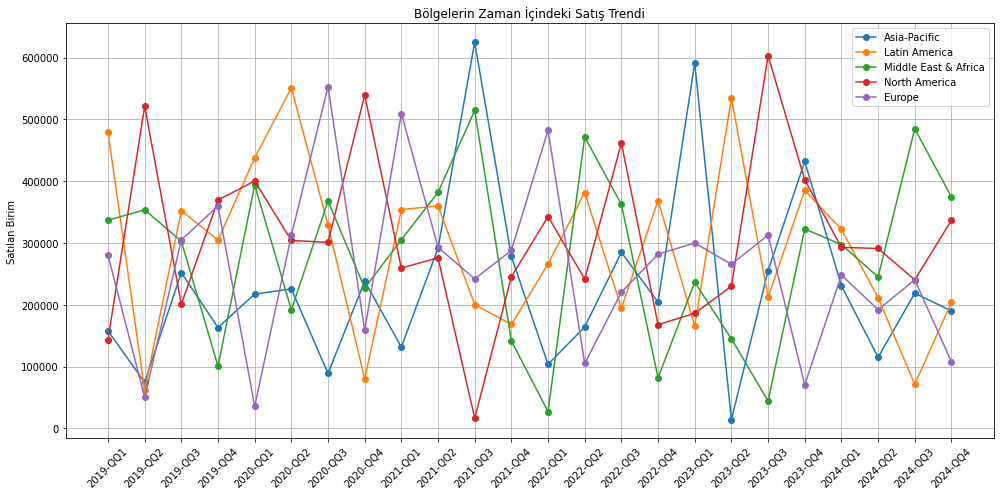

In [16]:


# Her bölgenin çeyreklik performans trendi
plt.figure(figsize=(14, 7))
for bolge in df['Bölge'].unique():
    bolge_trend = df[df['Bölge'] == bolge].groupby(['Yıl', 'Çeyrek'])['Satılan Birim'].sum().reset_index()
    bolge_trend['Dönem'] = bolge_trend['Yıl'].astype(str) + '-Q' + bolge_trend['Çeyrek'].astype(str)
    plt.plot(range(len(bolge_trend)), bolge_trend['Satılan Birim'], marker='o', label=bolge)

plt.xticks(range(len(ceyrek_trend)), ceyrek_trend['Dönem'], rotation=45)
plt.title('Bölgelerin Zaman İçindeki Satış Trendi')
plt.ylabel('Satılan Birim')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
